# Future Fortune

### Are you better off investing your money in a pension fund or the stock market?

Everyone knows that pension funds are safe and the stock market can be volatile. But pension funds often invest your money in the stock market anyway. So which is better? If we assume an average annual rate of return of 6% in a pension fund and between 8% and 10% in the diversified index fund (to spread risk), simulations here suggest that the latter is significantly more lucrative over the long-term due to the logic of cumulative returns. 

### Parameters

In [1]:
# financials 
initial_savings = 1000
pension_return = 0.06
index_return = [0.08, 0.09, 0.1]
inflation = [0.021, 0.023, 0.025, 0.027, 0.029]

# simulation years
retirement_age = 67
current_age = 30
years = retirement_age - current_age

### Functions

In [2]:
# adds returns 
def add_return(fund, return_rate):
    added_rate = fund * (1 + return_rate)
    return added_rate
    

# adjusts any future figures to see what they look like in today's money
def inflation_adjusted(figure, years, inflation):
    for i in range(years):
        figure = figure * (1 - inflation)
    return figure
    

# runs the simulation
def run_sim(inflation, index_return):

    # initializes both fund as my initial pension fund savings (£1000)
    pension = initial_savings
    index = initial_savings 

    # creates ledger variable so we can plot find values at each year
    pension_ledger = [] 
    index_ledger = []

    # loops over each year
    for year in range(years):

        # adds the respectibe return for each fund 
        pension = add_return(pension, pension_return)
        index = add_return(index, index_return)

        # appends an inflation adjusted version for plotting to see the results in today's money
        pension_ledger.append(inflation_adjusted(pension, year, inflation))
        index_ledger.append(inflation_adjusted(index, year, inflation))
        
    return pension_ledger, index_ledger


# plots the results given a certain pension and index return
import matplotlib.pyplot as plt
def subplots(index_return):

    # creates a variable to store all simulation results so the y axis can be fixed within this range later
    all_figures = []
    
    # fills these variables with zeros so they can be replaced with a results set in the loop below
    pension_ledger = [0 for x in inflation]
    index_ledger = [0 for x in inflation]
    
    # loops through the simulations for different inflation values
    for i, value in enumerate(inflation):
        pension_ledger[i], index_ledger[i] = run_sim(value, index_return)
        all_figures.extend(pension_ledger[i] + index_ledger[i])
    
    # value the y axis will be fixed to below
    max_val = max(all_figures) / 1000
    
    # creates several subplot parameters
    results = ['pension_ledger', 'index_ledger']
    colors = ['blue', 'red', 'orange', 'green', 'purple']
    titles = ['Pension Fund', 'Index Fund']

    # creates a subplots object
    fig, ax = plt.subplots(1, 2, figsize=(16, 4))

    # loops through subplots for different fund types
    for i in range(2):
    
        # creates multiple plot lines for different inflation values
        figures_list = []
        for j in range(len(inflation)):
            figures = [x / 1000 for x in eval(results[i])[j]]
            ax[i].plot(range(years), figures, color=colors[j])
            figures_list.append(figures[len(figures)-1]) ### inserts the last value into figures_list so it can be included in the title below
    
        ax[i].set_ylim(0, max_val)
        ax[i].set_ylabel('£000s', size=14)
        ax[i].set_xlabel('Years', size=14)
        ax[i].set_title(titles[i] + ': £' + str(round(min(figures_list),2)) + 'k' + ' - £' + str(round(max(figures_list),2)) + 'k', size=16)
        ax[i].legend([round(x * 100, 2) for x in inflation], title='Inflation (%)')

    fig.suptitle('Index return: ' + str(round(index_return * 100, 2)) + '%', size=25, y=1.075)

### Results

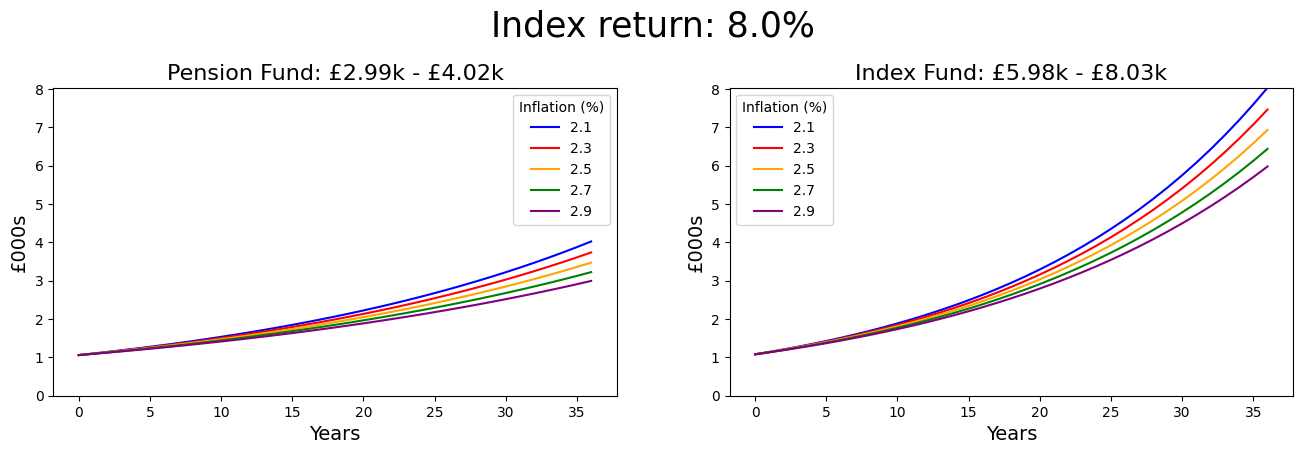

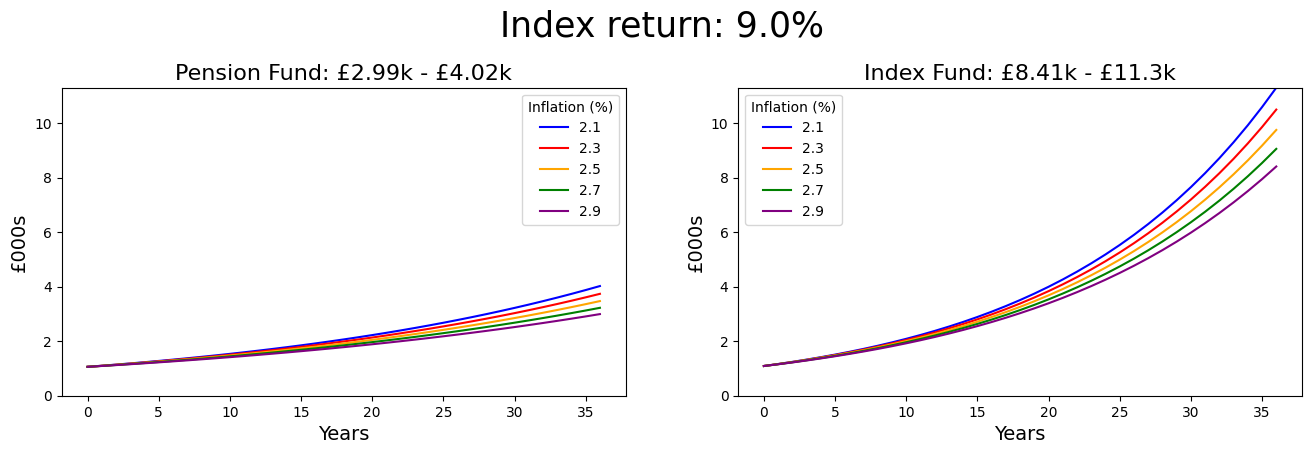

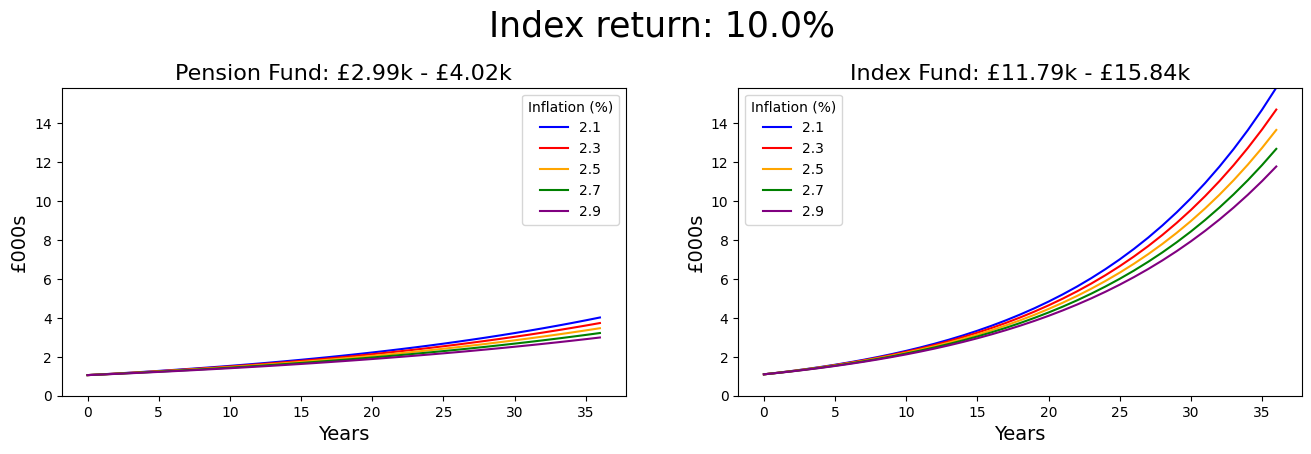

In [3]:
# loops through different index fund returns
for return_val in index_return:
    subplots(return_val)